In [65]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

from math import isnan


# Create Feature Vectors for Cosine Similarity with AU3
All of these figures are rough estimates by US Census and ACS data.

In [66]:
final_df = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/heatmap_data/educational_attainment_2012.csv").iloc[1:]
final_df = final_df[['NAME', 'S1501_C01_014E']]
final_df['S1501_C01_014E'] = final_df['S1501_C01_014E'].astype(float) 
final_df = final_df.rename(columns = {'S1501_C01_014E': 'High School Graduation Rate'})

employment = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/heatmap_data/employment_2012.csv").iloc[1:]['S2301_C04_026E']
final_df['Unemployment Rate'] = employment.astype(float)

health_insurance = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/heatmap_data/health_insurance_2012.csv").iloc[1:]
health_insurance = health_insurance[['S2701_C01_001E', 'S2701_C02_001E']].astype(int)
health_insurance = health_insurance['S2701_C02_001E'].div(health_insurance['S2701_C01_001E'])
final_df['Percent Uninsured for Health'] = health_insurance.astype(float)

median_income = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/heatmap_data/median_income_2012.csv")

num_households = median_income['S1903_C01_001E'].iloc[1:].astype(int)

median_income = median_income['S1903_C02_001E'].iloc[1:]
final_df['Median Household Income'] = median_income.astype(int)

food_stamps = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/heatmap_data/food_stamps_2012.csv").iloc[1:]
food_stamps = food_stamps['S2201_C02_001E'].astype(int).div(num_households)
final_df['Percentage of Households on Food Stamps'] = food_stamps.astype(float)

final_df = final_df.sort_values(by = 'NAME')
final_df.NAME = final_df.NAME.map(lambda x: x.replace(' Metro Area', '').replace(' Micro Area', ''))
final_df


,NAME,High School Graduation Rate,Unemployment Rate,Percent Uninsured for Health,Median Household Income,Percentage of Households on Food Stamps
15,"Aberdeen, WA",86.6,23.7,0.173578,42057,0.216212
16,"Abilene, TX",83.5,17.5,0.187588,43407,0.136550
17,"Adrian, MI",91.0,25.8,0.111519,48224,0.140139
18,"Aguadilla-Isabela-San Sebasti?n, PR",66.0,31.8,0.059501,15339,0.454933
19,"Akron, OH",90.6,21.9,0.111187,49731,0.149729
...,...,...,...,...,...,...
10,"York-Hanover, PA",87.5,17.0,0.091445,55648,0.090488
11,"Youngstown-Warren-Boardman, OH-PA",88.7,13.6,0.118995,40686,0.179525
12,"Yuba City, CA",80.2,24.0,0.158815,45646,0.136201
13,"Yuma, AZ",71.6,20.6,0.255714,39485,0.219310


In [67]:
au3 = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/AU3_results.csv")[:-1].rename(columns = {'CBSA_Codes': 'RegionName'})
au3['RegionName'].iloc[1:] = au3['RegionName'].iloc[1:].astype(int)
metro_data = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/metro_data.csv")[['RegionName', 'MetroName']]
au3 = pd.merge(au3, metro_data, on = 'RegionName')
au3 = au3.drop_duplicates(subset=None, keep='first', inplace=False).drop(columns = ['Unnamed: 0', 'RegionName'])
au3 = au3.rename(columns = {'MetroName': 'NAME'})
au3

,AU3,NAME
0,0.795075,"Ada, OK"
261,6.300922,"Adrian, MI"
522,5.965741,"Akron, OH"
783,5.699291,"Albany, GA"
1044,5.281652,"Albany, OR"
...,...,...
166912,6.255158,"Youngstown, OH"
167173,6.139532,"Yuba City, CA"
167434,6.139876,"Yuma, AZ"
167695,4.602732,"Zanesville, OH"


In [68]:
final_df_au3 = au3.merge(final_df, on = 'NAME', how = 'right', suffixes = ('', '_y')).dropna()
col_list = list(final_df_au3)
col_list[0], col_list[1] = col_list[1], col_list[0]
final_df_au3 = final_df_au3.ix[:, col_list]
final_df_au3

,NAME,AU3,High School Graduation Rate,Unemployment Rate,Percent Uninsured for Health,Median Household Income,Percentage of Households on Food Stamps
0,"Adrian, MI",6.300922,91.0,25.8,0.111519,48224,0.140139
1,"Akron, OH",5.965741,90.6,21.9,0.111187,49731,0.149729
2,"Albany, GA",5.699291,79.9,19.3,0.206726,34469,0.238583
3,"Albuquerque, NM",5.356778,88.0,13.4,0.153148,46725,0.156425
4,"Alexandria, LA",4.384656,84.6,8.9,0.164420,40896,0.214571
...,...,...,...,...,...,...,...
241,"Worcester, MA",5.764700,89.9,16.5,0.041914,62505,0.130972
242,"Yakima, WA",4.417720,70.7,12.8,0.231651,43942,0.248458
243,"Yuba City, CA",6.139532,80.2,24.0,0.158815,45646,0.136201
244,"Yuma, AZ",6.139876,71.6,20.6,0.255714,39485,0.219310


## Standardise, Create 'Good/Bad' Measure

In [71]:
def standardise(col):
    return (col - col.mean()) / col.std()

def reverse_measure(col):
    return 1 - col

for i in range(1, len(final_df_au3.columns)):
    final_df_au3[final_df_au3.columns[i]] = standardise(final_df_au3[final_df_au3.columns[i]])

# Higher statistics are 'worse'
reverse_measure_cols = ['Unemployment Rate', 'Percent Uninsured for Health', 'Percentage of Households on Food Stamps']

for reverse_measure_col in reverse_measure_cols:
    final_df_au3[reverse_measure_col] = reverse_measure(final_df_au3[reverse_measure_col])

final_df_au3 = final_df_au3.sort_values(by = 'AU3')
final_df_au3

,NAME,AU3,High School Graduation Rate,Unemployment Rate,Percent Uninsured for Health,Median Household Income,Percentage of Households on Food Stamps
155,"Oklahoma City, OK",-4.619903,0.173485,2.060095,0.417636,0.351342,1.316141
127,"Lincoln, NE",-4.091965,1.217907,1.246439,1.688931,0.624907,2.084625
163,"Pittsburgh, PA",-3.462344,0.983813,0.659540,2.314064,0.601710,1.465431
205,"Sioux Falls, SD",-3.460070,0.857762,1.126392,1.917090,0.764475,2.249066
118,"Lake Charles, LA",-3.301496,-0.150646,0.459461,0.139326,-0.096392,1.192281
...,...,...,...,...,...,...,...
221,"Terre Haute, IN",0.807578,0.029427,1.779984,0.727923,-0.622916,0.800327
178,"Richmond, IN",0.841006,-0.420756,1.953386,-0.354876,-1.614799,0.738391
134,"Marion, IN",0.861295,0.299536,-1.301237,1.269548,-0.903090,1.233832
225,"Tucson, AZ",0.861360,0.155478,0.699556,0.845168,-0.140452,0.834472


## Transpose DataFrame for Feature Creation

In [72]:
f = final_df_au3.T
new_header = f.iloc[0]
f = f[1:]
f.columns = new_header
f

NAME,"Oklahoma City, OK","Lincoln, NE","Pittsburgh, PA","Sioux Falls, SD","Lake Charles, LA","Grand Island, NE","Rochester, NY","Owensboro, KY","Bloomington, IN","Bismarck, ND",...,"Midland, MI","Mansfield, OH","Monroe, MI","Seneca, SC","Muncie, IN","Terre Haute, IN","Richmond, IN","Marion, IN","Tucson, AZ","Carson City, NV"
AU3,-4.6199,-4.09196,-3.46234,-3.46007,-3.3015,-2.87189,-2.81877,-2.80544,-2.72277,-2.71127,...,0.690703,0.71117,0.713984,0.728662,0.79956,0.807578,0.841006,0.861295,0.86136,6.47073
High School Graduation Rate,0.173485,1.21791,0.983813,0.857762,-0.150646,-0.330719,0.659682,-0.0786172,0.569645,1.12787,...,1.50602,0.0474338,0.767725,-1.12304,0.209499,0.0294265,-0.420756,0.299536,0.155478,-0.276697
Unemployment Rate,2.06009,1.24644,0.65954,1.12639,0.459461,2.5803,1.00634,2.03342,2.12679,1.12639,...,1.51321,1.68661,0.632863,-1.38127,-0.781031,1.77998,1.95339,-1.30124,0.699556,0.646201
Percent Uninsured for Health,0.417636,1.68893,2.31406,1.91709,0.139326,0.70814,2.48917,1.00579,1.18586,2.28415,...,1.68537,1.58832,2.01418,0.377449,1.05791,0.727923,-0.354876,1.26955,0.845168,-0.579179
Median Household Income,0.351342,0.624907,0.60171,0.764475,-0.0963918,0.225769,0.629183,-0.235053,-0.913846,2.09705,...,0.843655,-0.539849,0.625814,-1.0967,-1.14218,-0.622916,-1.6148,-0.90309,-0.140452,0.509701
Percentage of Households on Food Stamps,1.31614,2.08463,1.46543,2.24907,1.19228,1.70916,1.26018,0.555415,1.72127,2.736,...,1.09971,0.671185,1.8192,0.938964,0.615533,0.800327,0.738391,1.23383,0.834472,1.46511


In [74]:
au3_dict = {k: [np.repeat(f[k].iloc[0], 5)] for k in list(f.columns)}
non_au3_dict = {k: [f[k].iloc[1:6].values] for k in list(f.columns)}

for k in au3_dict.keys():
    vector[k] = np.append(au3_dict[k], non_au3_dict[k])[0:10]

vector



.23466447130035367,
        1.1670107447826217], dtype=object),
 'Pueblo, CO': array([0.21063999941368003, 0.21063999941368003, 0.21063999941368003,
        0.21063999941368003, 0.21063999941368003, 0.11946296847301559,
        -0.9944486187144992, 1.2166578505450225, -0.5940177863155665,
        0.24105776082874475], dtype=object),
 'Punta Gorda, FL': array([0.5994747158658214, 0.5994747158658214, 0.5994747158658214,
        0.5994747158658214, 0.5994747158658214, 0.40757953949616754,
        -2.901870892839465, 0.6469673472727608, -0.07760128421112263,
        1.769701918276846], dtype=object),
 'Racine, WI': array([0.32100293249426015, 0.32100293249426015, 0.32100293249426015,
        0.32100293249426015, 0.32100293249426015, 0.2635212539845916,
        0.44612204985540616, 1.4254973528960184, 0.7850799339844312,
        0.7399054681101773], dtype=object),
 'Rapid City, SD': array([0.02006352069391764, 0.02006352069391764, 0.02006352069391764,
        0.02006352069391764, 0.02006352

In [78]:
from sklearn.metrics.pairwise import cosine_similarity


def cos_sim(metro):
    cos_sim = cosine_similarity([vector[metro][:5], vector[metro][5:]])[0][1]
    return cos_sim

CS = []
v = {}

for metro in list(vector.keys()):
    v[metro] = cos_sim(metro)

v

{'Adrian, MI': 0.7300063042727115,
 'Akron, OH': 0.8574620060600273,
 'Albany, GA': -0.651962296886984,
 'Albuquerque, NM': 0.8290109905205338,
 'Alexandria, LA': -0.2667319750575846,
 'Altoona, PA': -0.6049017795632403,
 'Amarillo, TX': -0.444940961949209,
 'Anchorage, AK': -0.786026128040127,
 'Ann Arbor, MI': 0.9331216744631268,
 'Appleton, WI': -0.9599034752538859,
 'Asheville, NC': 0.6032156509194361,
 'Ashtabula, OH': 0.23595291456888562,
 'Auburn, NY': -0.6866404078443463,
 'Bangor, ME': 0.6115517108369437,
 'Baton Rouge, LA': -0.8664889814030681,
 'Battle Creek, MI': 0.5225306949280835,
 'Bay City, MI': -0.7520443000965371,
 'Beaver Dam, WI': 0.8565876273049406,
 'Bellingham, WA': 0.8749610052227716,
 'Bend, OR': 0.8031232572901225,
 'Billings, MT': 0.8991738932808309,
 'Binghamton, NY': -0.830524633092711,
 'Bismarck, ND': -0.9456599284811933,
 'Bloomington, IN': -0.6615124520926176,
 'Boulder, CO': -0.9640427426461458,
 'Bowling Green, KY': -0.5381241308153296,
 'Brunswick, G

### Should not be expecting any geographic correlation, since we are just evaluating how similar our AU3 score is to various standardised "good/bad statistics"

In [131]:
df = pd.DataFrame({'NAME': list(v.keys()), 'CS': list(v.values())})
df = df.dropna().reset_index().sort_values(by = 'CS', ascending = False)

mean_cosine_similarity = df['CS'].mean()
print('Average cosine similarity: ' + str(mean_cosine_similarity))
df

Average cosine similarity: 0.14427976680878857


,index,NAME,CS
152,152,"Oak Harbor, WA",0.986435
46,46,"Concord, NH",0.982214
132,132,"Madison, WI",0.981924
182,182,"Rochester, MN",0.980665
112,112,"Keene, NH",0.976593
...,...,...,...
36,36,"Cheyenne, WY",-0.944988
22,22,"Bismarck, ND",-0.945660
9,9,"Appleton, WI",-0.959903
24,24,"Boulder, CO",-0.964043


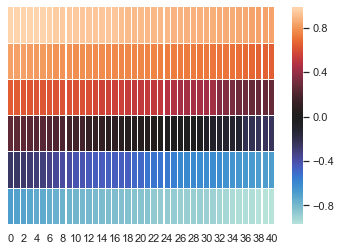

In [91]:
vals = df['CS'].values.reshape(6, 41)
sns.heatmap(vals, center = 0, yticklabels=False, linewidth = 0.1)

In [128]:
metro_data = pd.read_csv('/Users/camilledunning/Desktop/ds3-zillow/datasets/metro_data.csv')
metro_data = metro_data[['RegionName', 'MetroName']]
metro_data = metro_data.rename(columns = {'MetroName': 'NAME'})
final = pd.merge(metro_data, df)

lat_long_data = pd.read_csv('/Users/camilledunning/Desktop/ds3-zillow/geocoding_data/geocode_cbsa_crosswalk.csv')
lat_long_data = lat_long_data.rename(columns = {'CBSA': 'RegionName'})
final = pd.merge(final, lat_long_data).drop_duplicates('NAME').drop(columns = ['index', 'Unnamed: 0'])
final.to_csv("cbsa_cs.csv")

In [129]:
final

,RegionName,NAME,CS,Latitude,Longitude
0,10300,"Adrian, MI",0.730006,42.164890,-83.78387
6003,10420,"Akron, OH",0.857462,41.321189,-81.50135
25056,10500,"Albany, GA",-0.651962,31.580774,-84.16044
31581,10740,"Albuquerque, NM",0.829011,35.388701,-106.42793
48546,10780,"Alexandria, LA",-0.266732,30.937089,-92.94802
...,...,...,...,...,...
2173972,16940,"Cheyenne, WY",-0.944988,41.141281,-104.80208
2177527,11260,"Anchorage, AK",-0.786026,61.216799,-149.87828
2184983,21820,"Fairbanks, AK",0.909961,64.835070,-147.72045
2188012,16500,"Centralia, WA",0.440510,46.755230,-122.01544
